## Exploratory analysis of the US Airport Dataset

This dataset contains data for 25 years[1995-2015] of flights between various US airports and metadata about these routes. Taken from Bureau of Transportation Statistics, United States Department of Transportation.

Let's see what can we make out of this!

In [1]:
%matplotlib inline
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

pass_air_data = pd.read_csv('datasets/passengers.csv')

We create 5 graphs (one for each year), it may take a couple of minutes to load all the graphs.

In [2]:
pass_air_data.head()

,YEAR,ORIGIN,DEST,PASSENGERS
0,1990,ABE,ACY,73.0
1,1990,ABE,ATL,73172.0
2,1990,ABE,AVL,0.0
3,1990,ABE,AVP,8397.0
4,1990,ABE,BHM,59.0


In [3]:
passenger_graph = nx.from_pandas_edgelist(pass_air_data, source='ORIGIN', target='DEST', edge_attr=['YEAR', 'PASSENGERS'], create_using=nx.MultiDiGraph())

### Cleveland to Chicago, how many people fly this route?

In [4]:
passenger_graph['CLE']['ORD']

AtlasView({0: {'YEAR': 1990, 'PASSENGERS': 386602.0}, 1: {'YEAR': 1991, 'PASSENGERS': 404416.0}, 2: {'YEAR': 1992, 'PASSENGERS': 437666.0}, 3: {'YEAR': 1993, 'PASSENGERS': 436678.0}, 4: {'YEAR': 1994, 'PASSENGERS': 475496.0}, 5: {'YEAR': 1995, 'PASSENGERS': 488581.0}, 6: {'YEAR': 1996, 'PASSENGERS': 465392.0}, 7: {'YEAR': 1997, 'PASSENGERS': 446734.0}, 8: {'YEAR': 1998, 'PASSENGERS': 438346.0}, 9: {'YEAR': 1999, 'PASSENGERS': 431422.0}, 10: {'YEAR': 2000, 'PASSENGERS': 391718.0}, 11: {'YEAR': 2001, 'PASSENGERS': 342602.0}, 12: {'YEAR': 2002, 'PASSENGERS': 348070.0}, 13: {'YEAR': 2003, 'PASSENGERS': 350769.0}, 14: {'YEAR': 2004, 'PASSENGERS': 390006.0}, 15: {'YEAR': 2005, 'PASSENGERS': 397852.0}, 16: {'YEAR': 2006, 'PASSENGERS': 388539.0}, 17: {'YEAR': 2007, 'PASSENGERS': 378752.0}, 18: {'YEAR': 2008, 'PASSENGERS': 340616.0}, 19: {'YEAR': 2009, 'PASSENGERS': 339208.0}, 20: {'YEAR': 2010, 'PASSENGERS': 313656.0}, 21: {'YEAR': 2011, 'PASSENGERS': 303419.0}, 22: {'YEAR': 2012, 'PASSENGERS'

In [5]:
temp = [(i['YEAR'], i['PASSENGERS'])for i in dict(passenger_graph['CLE']['ORD']).values()]

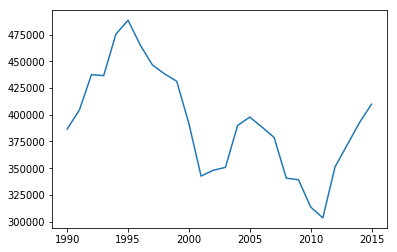

In [6]:
x, y = zip(*temp)
plt.plot(x, y)
plt.show()

## Exercise

Find the busiest route in 1990 and in 2015 according to number of passengers, and plot the time series of number of passengers on these routes.

You can use the DataFrame instead of working with the network. It will be faster ;)

In [7]:
temp = pass_air_data.groupby(['YEAR'])['PASSENGERS'].transform(max) == pass_air_data['PASSENGERS']

In [8]:
pass_air_data[temp][pass_air_data.YEAR.isin([1990, 2015])]

/Users/mridulseth/dev/venv/system/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,YEAR,ORIGIN,DEST,PASSENGERS
3917,1990,LAX,HNL,1827164.0
445978,2015,LAX,SFO,1869066.0


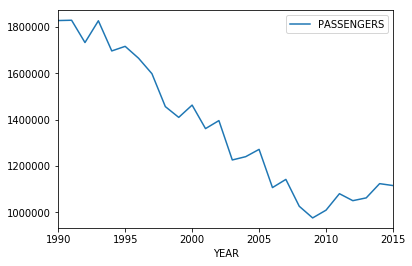

In [9]:
pass_air_data[(pass_air_data['ORIGIN'] == 'LAX') & (pass_air_data['DEST'] == 'HNL')].plot('YEAR', 'PASSENGERS')

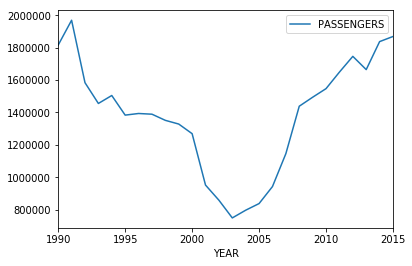

In [10]:
pass_air_data[(pass_air_data['ORIGIN'] == 'LAX') & (pass_air_data['DEST'] == 'SFO')].plot('YEAR', 'PASSENGERS')

So let's have a look at the important nodes in this network, i.e. important airports in this network. We'll use pagerank, betweenness centrality and degree centrality.

In [11]:
nx.pagerank(passenger_graph)

NetworkXNotImplemented: not implemented for multigraph type

In [12]:
def year_network(G, year):
    temp_g = nx.DiGraph()
    for i in G.edges(data=True):
        if i[2]['YEAR'] == year:
            temp_g.add_edge(i[0], i[1], weight=i[2]['PASSENGERS'])
    return temp_g

In [13]:
pass_2015 = year_network(passenger_graph, 2015)

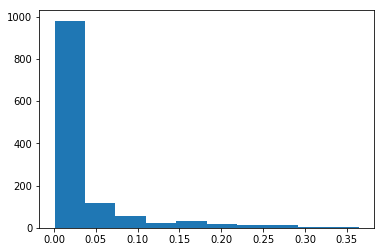

In [14]:
plt.hist(list(nx.degree_centrality(pass_2015).values()))
plt.show()

Let's plot a log log plot to get a better overview of this.

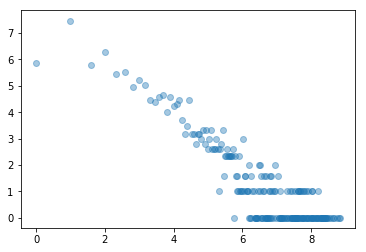

In [15]:
d = {}
for i, j in dict(nx.degree(pass_2015)).items():
    if j in d:
        d[j] += 1
    else:
        d[j] = 1
x = np.log2(list((d.keys())))
y = np.log2(list(d.values()))
plt.scatter(x, y, alpha=0.4)
plt.show()

### Directed Graphs

![title](images/pagerank.png)

In [16]:
G = nx.DiGraph()

G.add_edge(1, 2, weight=1)

# print(G.edges())
# G[1][2]
# G[2][1]
# G.is_directed()
# type(G)

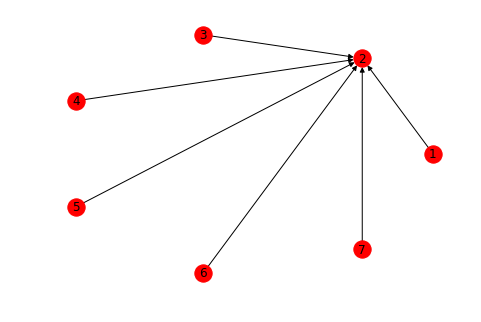

In [17]:
G.add_edges_from([(1, 2), (3, 2), (4, 2), (5, 2), (6, 2), (7, 2)])
nx.draw_circular(G, with_labels=True)

In [18]:
G.in_degree()

InDegreeView({1: 0, 2: 6, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0})

In [19]:
nx.pagerank(G)

{1: 0.0826448180198328,
 2: 0.5041310918810031,
 3: 0.0826448180198328,
 4: 0.0826448180198328,
 5: 0.0826448180198328,
 6: 0.0826448180198328,
 7: 0.0826448180198328}

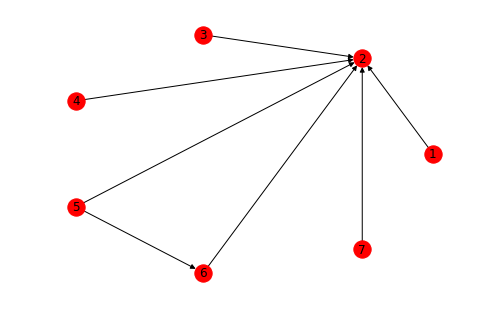

In [20]:
G.add_edge(5, 6)
nx.draw_circular(G, with_labels=True)

In [21]:
nx.pagerank(G)

{1: 0.08024854052495894,
 2: 0.4844028780560986,
 3: 0.08024854052495894,
 4: 0.08024854052495894,
 5: 0.08024854052495894,
 6: 0.11435441931910648,
 7: 0.08024854052495894}

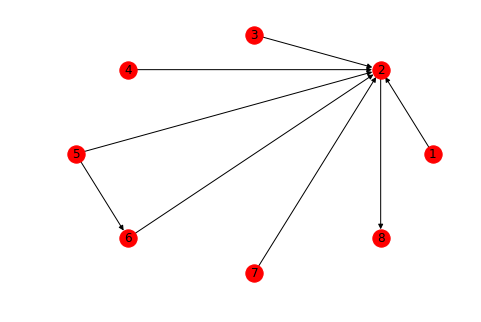

In [22]:
G.add_edge(2, 8)
nx.draw_circular(G, with_labels=True)

In [23]:
nx.pagerank(G)

{1: 0.05378612718073915,
 2: 0.3246687852772877,
 3: 0.05378612718073915,
 4: 0.05378612718073915,
 5: 0.05378612718073915,
 6: 0.0766454192258098,
 7: 0.05378612718073915,
 8: 0.3297551595932067}

### Moving back to Airports

In [24]:
sorted(nx.pagerank(pass_2015, weight=None).items(), key=lambda x:x[1], reverse=True)[:10]

[('ANC', 0.010425531156396332),
 ('HPN', 0.008715287139161587),
 ('FAI', 0.007865131822111036),
 ('DFW', 0.007168038232113773),
 ('DEN', 0.006557279519803018),
 ('ATL', 0.006367579588749718),
 ('ORD', 0.006178836107660135),
 ('YIP', 0.005821525504523931),
 ('ADQ', 0.005482597083474197),
 ('MSP', 0.005481962582230961)]

In [25]:
sorted(nx.betweenness_centrality(pass_2015).items(), key=lambda x:x[1], reverse=True)[0:10]

[('ANC', 0.28907458480586606),
 ('FAI', 0.08042857784594384),
 ('SEA', 0.06745549919241699),
 ('HPN', 0.06046810178534726),
 ('ORD', 0.045544143864829294),
 ('ADQ', 0.040170160000905696),
 ('DEN', 0.038543251364241436),
 ('BFI', 0.03811277548952854),
 ('MSP', 0.03774809342340624),
 ('TEB', 0.036229439542316354)]

In [26]:
sorted(nx.degree_centrality(pass_2015).items(), key=lambda x:x[1], reverse=True)[0:10]

[('ATL', 0.3643595863166269),
 ('ORD', 0.354813046937152),
 ('DFW', 0.3420843277645187),
 ('MSP', 0.3261734287987271),
 ('DEN', 0.31821797931583135),
 ('ANC', 0.3046937151949085),
 ('MEM', 0.29196499602227527),
 ('LAX', 0.2840095465393795),
 ('IAH', 0.28082736674622116),
 ('DTW', 0.27446300715990457)]

'ANC' is the airport code of Anchorage airport, a place in Alaska, and according to pagerank and betweenness centrality it is the most important airport in this network Isn't that weird? Thoughts?

related blog post: https://toreopsahl.com/2011/08/12/why-anchorage-is-not-that-important-binary-ties-and-sample-selection/

Let's look at weighted version, i.e taking into account the number of people flying to these places.

In [27]:
sorted(nx.betweenness_centrality(pass_2015, weight='weight').items(), key=lambda x:x[1], reverse=True)[0:10]

[('SEA', 2.2656145673621046e+50),
 ('ANC', 1.4996592705774285e+49),
 ('CDV', 1.1625885650735055e+49),
 ('ADQ', 8.328664868877188e+48),
 ('BFI', 6.99097447478957e+48),
 ('PHX', 3.84552515586718e+48),
 ('PDX', 3.120901981185909e+48),
 ('LRD', 4.583490839909188e+47),
 ('SIT', 1.7910862390475677e+46),
 ('FAI', 1.137539313512378e+46)]

In [28]:
sorted(nx.pagerank(pass_2015, weight='weight').items(), key=lambda x:x[1], reverse=True)[0:10]

[('ATL', 0.037535963029303135),
 ('ORD', 0.028329766122739346),
 ('SEA', 0.028274564067008245),
 ('ANC', 0.027127866647567035),
 ('DFW', 0.02570050418889442),
 ('DEN', 0.025260024346433315),
 ('LAX', 0.02394043498608451),
 ('PHX', 0.018373176636420224),
 ('CLT', 0.01780703930063076),
 ('LAS', 0.017649683141049966)]

## How reachable is this network?

We calculate the average shortest path length of this network, it gives us an idea about the number of jumps we need to make around the network to go from one airport to any other airport in this network.

In [29]:
nx.average_shortest_path_length(pass_2015)

NetworkXError: Graph is not weakly connected.

Wait, What??? This network is not connected. That seems like a really stupid thing to do.

In [ ]:
list(nx.weakly_connected_components(pass_2015))

### SPB, SSB, AIK anyone?

In [ ]:
pass_air_data[(pass_air_data['YEAR'] == 2015) & (pass_air_data['ORIGIN'] == 'AIK')]

In [ ]:
pass_2015.remove_nodes_from(['SPB', 'SSB', 'AIK'])

In [ ]:
nx.is_weakly_connected(pass_2015)

In [ ]:
nx.is_strongly_connected(pass_2015)

### Strongly vs weakly connected graphs.

In [ ]:
G = nx.DiGraph()
G.add_edge(1, 2)
G.add_edge(2, 3)
G.add_edge(3, 1)
nx.draw(G)

In [ ]:
G.add_edge(3, 4)
nx.draw(G)

In [ ]:
nx.is_strongly_connected(G)

In [ ]:
list(nx.strongly_connected_components(pass_2015))

In [ ]:
pass_air_data[(pass_air_data['YEAR'] == 2015) & (pass_air_data['DEST'] == 'TSP')]

In [ ]:
pass_2015_strong = max(nx.strongly_connected_component_subgraphs(pass_2015), key=len)

In [ ]:
len(pass_2015_strong)

In [ ]:
nx.average_shortest_path_length(pass_2015_strong)

#### Exercise! (Actually this is a game :D)

How can we decrease the avg shortest path length of this network?

Think of an effective way to add new edges to decrease the avg shortest path length.
Let's see if we can come up with a nice way to do this, and the one who gets the highest decrease wins!!!

The rules are simple:
- You can't add more than 2% of the current edges( ~500 edges)

[10 mins]

In [ ]:
sort_degree = sorted(nx.degree_centrality(pass_2015_strong).items(), key=lambda x:x[1], reverse=True)
top_count = 0
for n, v in sort_degree:
    count = 0
    for node, val in sort_degree:
        if node != n:
            if node not in pass_2015_strong.adj[n]:
                pass_2015_strong.add_edge(n, node)
                count += 1
                if count == 25:
                    break
    top_count += 1
    if top_count == 20:
        break

In [ ]:
nx.average_shortest_path_length(pass_2015_strong)